
# Física Nuclear y de Partículas #

## Tema 1. Principales características del núcleo atómico.  ##


César Fernández Ramírez\
Departamento de Física Interdisciplinar\
Universidad Nacional de Eduación a Distancia

Versión: Junio 2024

Contenidos:

- Densidad nuclear de Woods-Saxon
- Potencial de Woods-Saxon
- Representación de la energía de ligadura por nucleón de los núcleos en función de $Z$ y $N$
- Energía de ligadura por nucleón en función de $A$ para el núcleo más estable dado un $A$
- Drip line
- Parábola de masas

Se hace uso de las energías de ligaduras de los núcleos recopilados en la base de datos de la Agencia Internacional de la Energía Atómica (IAEA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import pandas as pd
import matplotlib.ticker as ticker

jpac_blue   = "#1F77B4"; jpac_red    = "#D61D28";
jpac_green  = "#2CA02C"; jpac_orange = "#FF7F0E";
jpac_purple = "#9467BD"; jpac_brown  = "#8C564B";
jpac_pink   = "#E377C2"; jpac_gold   = "#BCBD22";
jpac_aqua   = "#17BECF"; jpac_grey   = "#7F7F7F";

jpac_color = [jpac_blue, jpac_red, jpac_green, 
              jpac_orange, jpac_purple, jpac_brown,
              jpac_pink, jpac_gold, jpac_aqua, jpac_grey, 'black' ];

jpac_axes = jpac_color[10]
dashes = 60*'-'

# the service URL
livechart = "https://nds.iaea.org/relnsd/v1/data?"

# There have been cases in which the service returns an HTTP Error 403: Forbidden
# use this workaround
import urllib.request
def lc_pd_dataframe(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))

df = lc_pd_dataframe(livechart + "fields=ground_states&nuclides=all")
df = df[pd.to_numeric(df['binding'],errors='coerce').notna()]
df['binding'] /= 1000
df['A'] = df['n']+df['z']

uma = 931.4941024/1000000/1000


Atomic potential

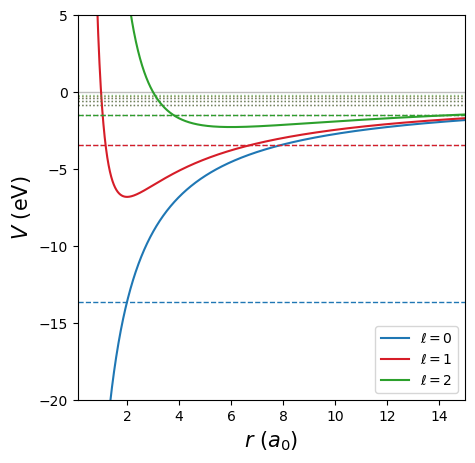

In [2]:
def coulomb(Z,r):
    return -2*Z/r

def barrera(l,r):
    return l*(l+1)/(r*r)

def potencial(Z,l,r):
    return coulomb(Z,r) + barrera(l,r)

def En(ry,nr,l):
    n = nr + l + 1
    return -ry/(n**2)

a0, ry  = 0.529177210903, 13.605693122994
Z, lmax, nmax = 1, 2, 5

fig = plt.figure(figsize=(5,5))
rmin, rmax, rstep = 0.1, 15, 0.01
r = np.arange(rmin,rmax,rstep)
plt.xlim((rmin,rmax))
plt.ylim((-20.,5))
plt.ylabel(r'$V$ (eV)',fontsize=15)
plt.xlabel(r'$r$ ($a_0$)',fontsize=15)

plt.hlines(0,rmin,rmax,colors=jpac_color[9], lw=1., linestyles='solid', alpha=0.5)
for l in range(lmax+1):
    texto = '$\ell=$' +  str(l)
    plt.plot(r,potencial(Z,l,r)*ry,'-',c=jpac_color[l],label=texto)
    plt.hlines(En(ry,0,l),rmin,rmax,colors=jpac_color[l], lw=1., linestyles='dashed')
    
    for n in range(1,nmax+1):
        plt.hlines(En(ry,n,l),rmin,rmax,colors=jpac_color[l], lw=1., linestyles='dotted', alpha=0.5)

plt.legend(loc='lower right',ncol=1,frameon=True)
plt.show()
#fig.savefig("hidrogeno.pdf", bbox_inches='tight')

Radio nuclear vs radio de carga

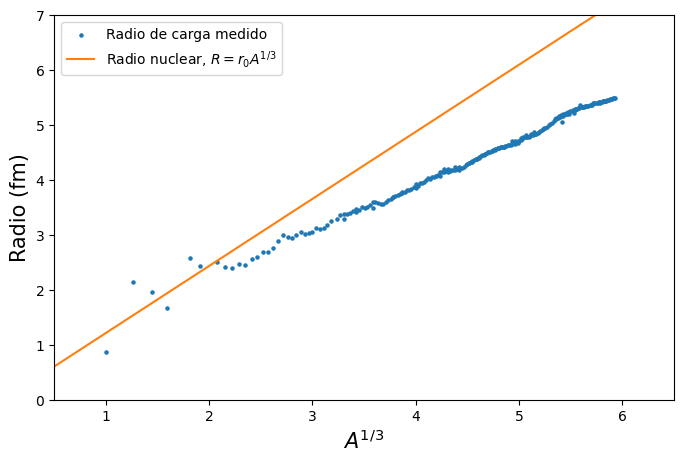

In [3]:
dfr = df.loc[(df['half_life']=='STABLE')].dropna(subset=['A', 'radius'])
fig = plt.figure(figsize=(8,5))
plt.xlim((0.5,6.5))
plt.ylim((0,7))
x = np.linspace(0,7,10)
plt.xlabel(r'$A^{1/3}$ ',fontsize=15)
plt.ylabel(r'Radio (fm)' ,fontsize=15)
plt.scatter(dfr['A']**(1/3),dfr['radius'],marker='o',s=5,c=jpac_color[0],label='Radio de carga medido')
plt.plot(x,1.22*x,'-',c=jpac_color[3],label=r'Radio nuclear, $R=r_0 A^{1/3}$')
plt.legend(loc='upper left',ncol=1,frameon=True)
plt.show()
#fig.savefig("RadioVsRadio.pdf", bbox_inches='tight')

Potencial de Woods-Saxon y densidad nuclear

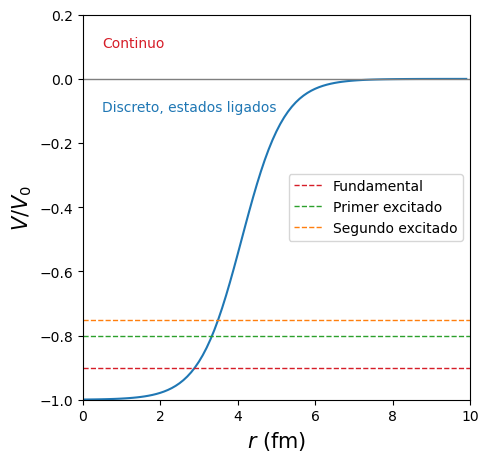

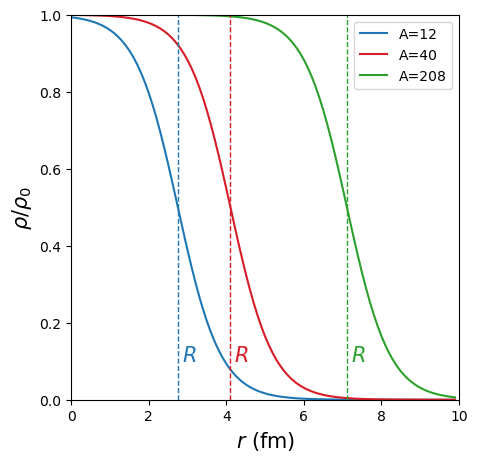

In [4]:
# A: Número de nucleones
# r0: constante, ha de ser 1.22
# a: espesor de la corteza

def radio(r0,A):
    return  r0*(A**(1/3))

def densidadnuclear(r0,A,a,r):
    R = radio(r0,A)
    return 1./(1.+np.exp((r-R)/a))

def WoodsSaxon(r0,A,a,r):
    R = radio(r0,A)
    return -1./(1.+np.exp((r-R)/a))

fig = plt.figure(figsize=(5,5))
r = np.arange(0.,10.,0.1)
plt.ylabel(r'$V/V_0$',fontsize=15)
plt.xlabel(r'$r$ (fm)',fontsize=15)
plt.xlim((0.,10.))
plt.ylim((-1.,0.2))
plt.plot(r,WoodsSaxon(1.2,40,0.55,r),'-',c=jpac_color[0])
plt.hlines(-0.90,0.,10.,colors=jpac_color[1], lw=1., linestyles='dashed',label='Fundamental')
plt.hlines(-0.80,0.,10.,colors=jpac_color[2], lw=1., linestyles='dashed',label='Primer excitado')
plt.hlines(-0.75,0.,10.,colors=jpac_color[3], lw=1., linestyles='dashed',label='Segundo excitado')
plt.hlines(0.,0.,10.,colors=jpac_color[9], lw=1., linestyles='solid')
plt.text(0.5,-0.1,r'Discreto, estados ligados',c=jpac_color[0],fontsize=10)
plt.text(0.5,0.1,r'Continuo',c=jpac_color[1],fontsize=10)
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()    

fig = plt.figure(figsize=(5,5))
r = np.arange(0.,10.,0.1)
plt.ylabel(r'$\rho/\rho_0$',fontsize=15)
plt.xlabel(r'$r$ (fm)',fontsize=15)
plt.xlim((0.,10.))
plt.ylim((0.,1.))

plt.plot(r,densidadnuclear(1.2,12,0.55,r),'-',c=jpac_color[0],label='A=12')
plt.plot(r,densidadnuclear(1.2,40,0.55,r),'-',c=jpac_color[1],label='A=40')
plt.plot(r,densidadnuclear(1.2,208,0.55,r),'-',c=jpac_color[2],label='A=208')
plt.vlines(radio(1.2,12),0.,1.,colors=jpac_color[0], lw=1., linestyles='dashed')
plt.vlines(radio(1.2,40),0.,1.,colors=jpac_color[1], lw=1., linestyles='dashed')
plt.vlines(radio(1.2,208),0.,1.,colors=jpac_color[2], lw=1., linestyles='dashed')
plt.text(radio(1.2,12)+0.1,0.1,r'$R$',c=jpac_color[0],fontsize=15)
plt.text(radio(1.2,40)+0.1,0.1,r'$R$',c=jpac_color[1],fontsize=15)
plt.text(radio(1.2,208)+0.1,0.1,r'$R$',c=jpac_color[2],fontsize=15)
plt.legend(loc='upper right',ncol=1,frameon=True)
plt.show()    

Abundancias

Masa promedio del Kr= 83.79799973927462 u.m.a.


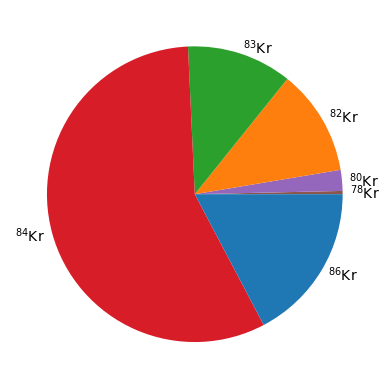

In [5]:
dfKr = df.query('symbol=="Kr"').dropna(subset=['abundance'])
print('Masa promedio del Kr=',np.sum(np.multiply( np.array(dfKr['atomic_mass']/1000000),np.array(dfKr['abundance']/100))),'u.m.a.')

labels = r'$^{78}$Kr', r'$^{80}$Kr', r'$^{82}$Kr', r'$^{83}$Kr', r'$^{84}$Kr', r'$^{86}$Kr'
sizes = dfKr['abundance']
colors = [ jpac_color[i] for i in np.arange(5,-1,-1)  ]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, labeldistance=1.05, textprops={'color':"k"})
plt.show()
#fig.savefig('Kripton.pdf', bbox_inches='tight')   

Representación de la energía de ligadura por nucleón de los núcleos en función de $Z$ y $N$

 
------------------------------------------------------------
IAEA NDS
------------------------------------------------------------
Número de núcleos en la base de datos: 3357
Par-Par:      847
Par-Impar:    855
Impar-Par:    818
Impar-Impar:  837
Comprobación. Total núcleos: 3357
 
------------------------------------------------------------
Número de núcleos estables en la base de datos: 244
Par-Par:      140
Par-Impar:    52
Impar-Par:    48
Impar-Impar:  4
Comprobación. Total núcleos estables: 244


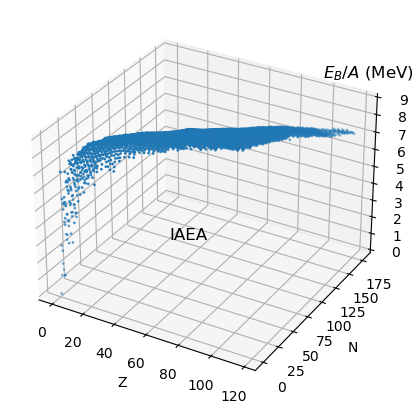

In [6]:
dfparpar = df.loc[ ((df['z']%2==0) & (df['n']%2==0))]
dfimparimpar = df.loc[ ((df['z']%2!=0) & (df['n']%2!=0))]
dfparimpar = df.loc[ ((df['z']%2==0) & (df['n']%2!=0))]
dfimparpar = df.loc[ ((df['z']%2!=0) & (df['n']%2==0))]

print(' '); print(dashes); print('IAEA NDS'); print(dashes);
print('Número de núcleos en la base de datos:',df['n'].count())
print('Par-Par:     ', dfparpar['z'].count())
print('Par-Impar:   ', dfparimpar['z'].count())
print('Impar-Par:   ', dfimparpar['z'].count())
print('Impar-Impar: ', dfimparimpar['z'].count())
total = dfparpar['z'].count()+ dfimparimpar['z'].count() +dfparimpar['z'].count()+dfimparpar['z'].count() 
print('Comprobación. Total núcleos:', total )

df_es = df.loc[(df['half_life']=='STABLE' )]
dfparpar_es = df_es.loc[ ((df_es['z']%2==0) & (df_es['n']%2==0))]
dfimparimpar_es = df_es.loc[ ((df_es['z']%2!=0) & (df_es['n']%2!=0))]
dfparimpar_es = df_es.loc[ ((df_es['z']%2==0) & (df_es['n']%2!=0))]
dfimparpar_es = df_es.loc[ ((df_es['z']%2!=0) & (df_es['n']%2==0))]

print(' '); print(dashes)
print('Número de núcleos estables en la base de datos:',df_es['n'].count())
print('Par-Par:     ', dfparpar_es['z'].count())
print('Par-Impar:   ', dfparimpar_es['z'].count())
print('Impar-Par:   ', dfimparpar_es['z'].count())
print('Impar-Impar: ', dfimparimpar_es['z'].count())
total_es = dfparpar_es['z'].count()+ dfimparimpar_es['z'].count() +dfparimpar_es['z'].count()+dfimparpar_es['z'].count() 
print('Comprobación. Total núcleos estables:', total_es )

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(projection='3d')
ax.set_zlim((0.,9.))
ax.set_xlabel('Z')
ax.set_ylabel('N')
ax.set_zlabel(r'$E_B/A$ (MeV)')
ax.text(110,140,11,r'$E_B/A$ (MeV)',c=jpac_color[10],fontsize=12)
ax.text(50,50,3,'IAEA',c=jpac_color[10],fontsize=12)
ax.scatter(df['z'],df['n'],df['binding'],marker='o',s=1,c=jpac_color[0])
plt.show()
#fig.savefig('BindingEnergy3DIAEA.pdf', bbox_inches='tight')   

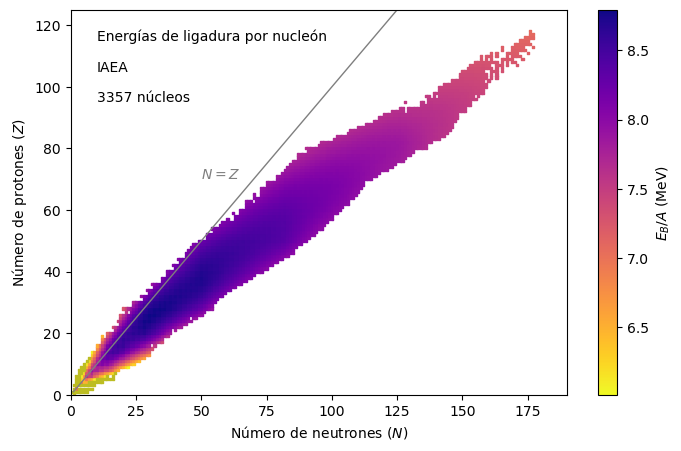

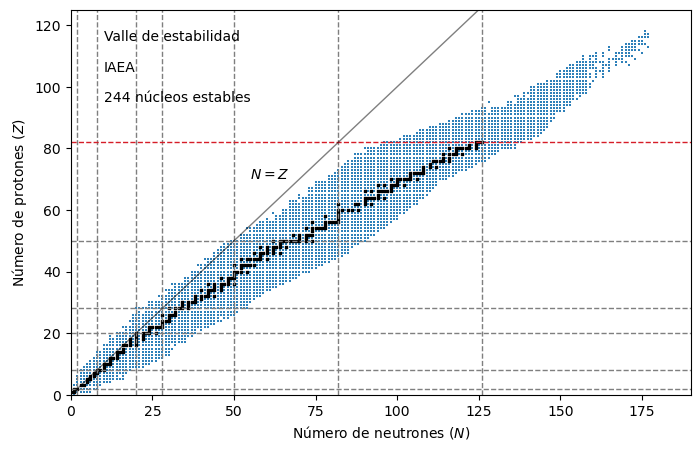

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
df1 = df.loc[(df['binding'] >= 6)]
df2 = df.loc[(df['binding'] < 6)]
ax.set_xlim((0,190))
ax.set_ylim((0,125))
x = np.linspace(1,125,125)
ax.plot(x,x,'-',lw=1,color=jpac_color[9])
ax.text(10,115,r'Energías de ligadura por nucleón',c=jpac_color[10],fontsize=10)
ax.text(10,105,r'IAEA',c=jpac_color[10],fontsize=10)
texto = str(df['n'].count()) + ' núcleos'
ax.text(10,95,texto,c=jpac_color[10],fontsize=10)
ax.text(50,70,r'$N=Z$',c=jpac_color[9],fontsize=10)
pa = ax.scatter(df1['n'],df1['z'],marker='s',s=2.5, c=df1['binding'], cmap='plasma_r')
fig.colorbar(pa,ax=ax,orientation='vertical',label=r'$E_B/A$ (MeV)')
ax.scatter(df2['n'],df2['z'],marker='s',s=2.5, c=jpac_color[7])
plt.show() 
#fig.savefig('CartaNuclearIAEA.pdf', bbox_inches='tight')   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,190))
ax.set_ylim((0,125))
plt.hlines( [2,8,20,28,50,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines( 82, 0, 190,colors=jpac_color[1], lw=1., linestyles='dashed')
ax.plot(x,x,'-',lw=1,color=jpac_color[10],alpha=0.5)
#y = np.linspace(20,125,100)
#ax.plot(y,3+y/1.5,'-',lw=5,color=jpac_color[3],alpha=0.5)
ax.text(10,115,r'Valle de estabilidad',c=jpac_color[10],fontsize=10)
ax.text(10,105,r'IAEA',c=jpac_color[10],fontsize=10)
texto = str(df_es['n'].count()) + ' núcleos estables'
ax.text(10,95,texto,c=jpac_color[10],fontsize=10)
ax.text(55,70,r'$N=Z$',c=jpac_color[10],fontsize=10)
ax.scatter(df['n'],df['z'],marker='s',s=2, c=jpac_color[0],edgecolors='white',lw=0.05)
ax.scatter(df_es['n'],df_es['z'],marker='s',s=2, c=jpac_color[10])
plt.show() 
#fig.savefig('ValleEstabilidadIAEA.pdf', bbox_inches='tight') 

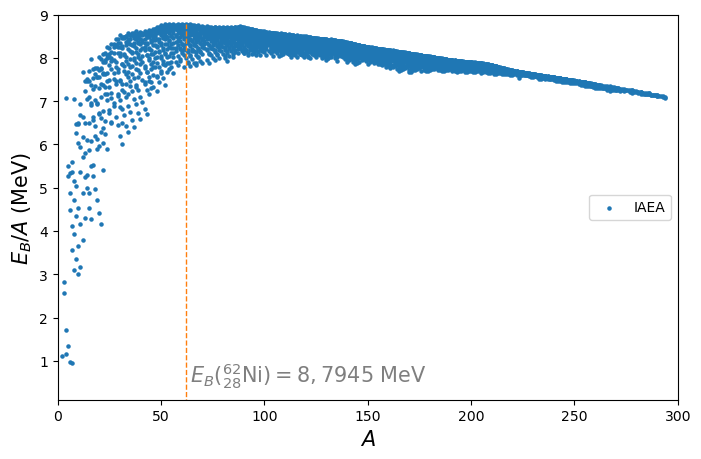

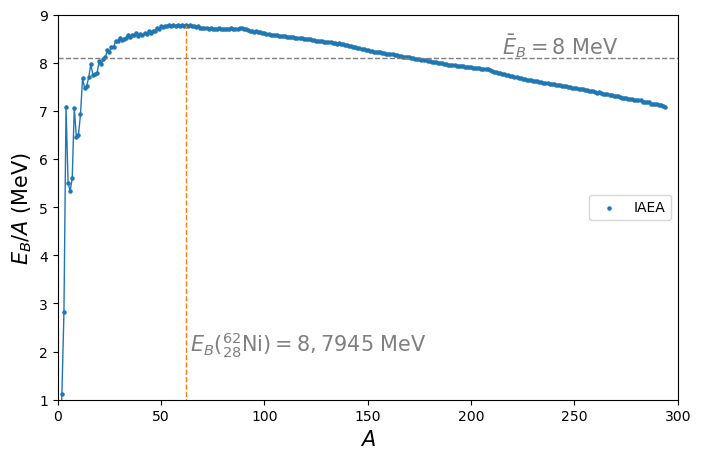

In [8]:
gdf = df.groupby('A')
maxavEbinda = gdf.apply(lambda t: t[t.binding==t.binding.max()])

fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((0.1,9))
plt.xlim((0,300))
plt.vlines(62,0,df['binding'].max(),colors=jpac_color[3], lw=1., linestyles='dashed')
plt.scatter(df['A'], df['binding'],marker='o',s=5,c=jpac_color[0],label='IAEA')
plt.text(64,0.5,r'$E_B(^{62}_{28}$Ni$)=8,7945$ MeV',c=jpac_color[9],fontsize=15)
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()  
#fig.savefig('BEIAEA.pdf', bbox_inches='tight')   

fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((1,9))
plt.xlim((0,300))
plt.hlines(8.09670568181818,0.,300.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines(62,0,maxavEbinda['binding'].max(),colors=jpac_color[3], lw=1., linestyles='dashed')
plt.scatter(maxavEbinda['A'], maxavEbinda['binding'],marker='o',s=5,c=jpac_color[0],label='IAEA')
plt.plot(maxavEbinda['A'], maxavEbinda['binding'],'-',lw=1,c=jpac_color[0])
plt.text(215,8.2,r'$\bar{E}_B=8$ MeV',c=jpac_color[9],fontsize=15)
plt.text(64,2,r'$E_B(^{62}_{28}$Ni$)=8,7945$ MeV',c=jpac_color[9],fontsize=15)
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()  

Energía de separación

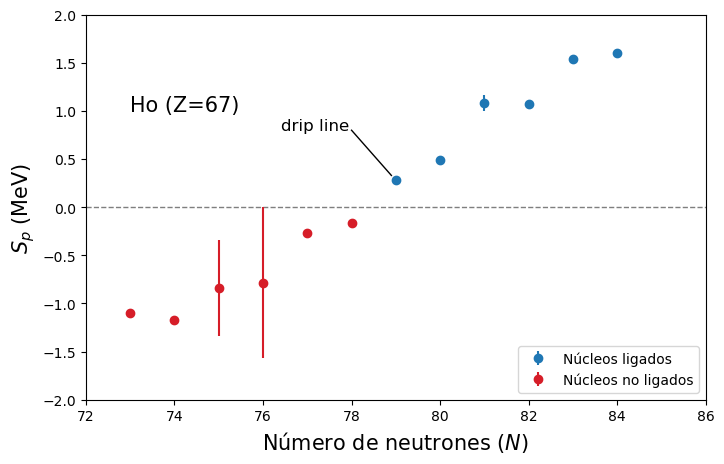

In [9]:
dfHo = df.query('symbol=="Ho"')
dfHoAp = dfHo.dropna(subset=['sp', 'unc_sp'])
df1 = dfHoAp.loc[(dfHoAp['sp'] >= 0)]
df2 = dfHoAp.loc[(dfHoAp['sp'] < 0)]

fig = plt.figure(figsize=(8,5))
plt.xlabel(r'Número de neutrones ($N$)',fontsize=15)
plt.ylabel(r'$S_p$ (MeV)',fontsize=15)
plt.ylim((-2,2))
plt.xlim((72,86))
plt.hlines(0,72.,86.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.errorbar(df1['n'], df1['sp']/1000,yerr=df1['unc_sp']/1000,fmt='o',c=jpac_color[0],label='Núcleos ligados')
plt.errorbar(df2['n'], df2['sp']/1000,yerr=df2['unc_sp']/1000,fmt='o',c=jpac_color[1],label='Núcleos no ligados')
plt.text(73,1,'Ho (Z=67)',c=jpac_color[10],fontsize=15)
plt.plot([78,78.9],[0.8,0.33],'-',lw=1,c=jpac_color[10])
plt.text(76.4,0.8,'drip line',c=jpac_color[10],fontsize=12)
plt.legend(loc='lower right',ncol=1,frameon=True)
plt.show()  
#fig.savefig('driplinePHo.pdf', bbox_inches='tight') 

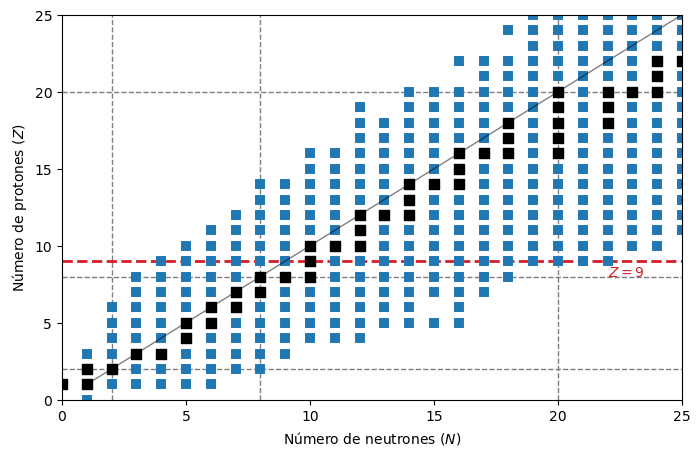

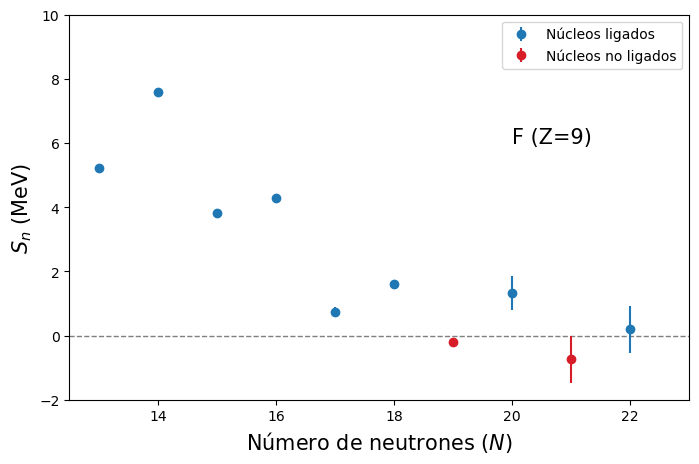

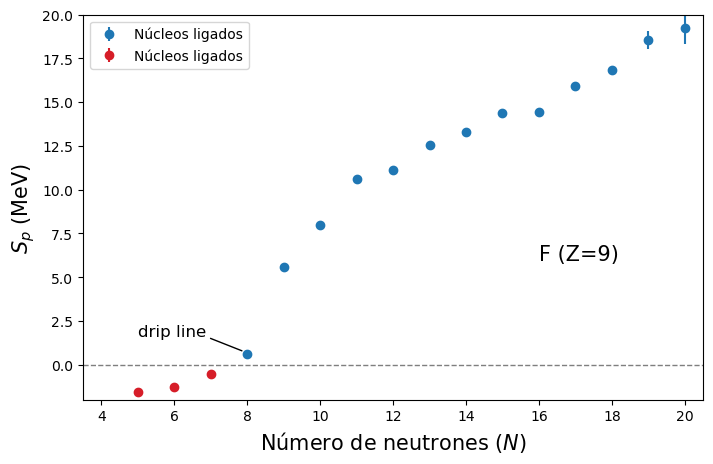

In [10]:
dfF = df.query('z==9')
dfFAp = dfF.dropna(subset=['sp', 'unc_sp'])
dfFAn = dfF.dropna(subset=['sn', 'unc_sn'])

df1 = dfFAp.loc[(dfFAp['sp'] >= 0)]
df2 = dfFAp.loc[(dfFAp['sp'] < 0)]

df3 = dfFAn.loc[(dfFAn['sn'] >= 0)]
df4 = dfFAn.loc[(dfFAn['sn'] < 0)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,25))
ax.set_ylim((0,25))
plt.hlines( [2,8,20,28,50,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed',zorder=0)
plt.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed',zorder=0)
plt.hlines( 9, 0, 25,colors=jpac_color[1], lw=2, linestyles='dashed',zorder=0)
ax.plot(x,x,'-',lw=1,color=jpac_color[10],alpha=0.5)
y = np.linspace(20,125,100)
ax.text(22,8,r'$Z=9$',c=jpac_color[1],fontsize=10)
ax.scatter(df['n'],df['z'],marker='s',s=50, c=jpac_color[0],edgecolors='white',lw=0.05)
ax.scatter(df_es['n'],df_es['z'],marker='s',s=50, c=jpac_color[10],zorder=1)
plt.show() 
#fig.savefig('ValleEstabilidadIAEA_ZOOM.pdf', bbox_inches='tight') 

fig = plt.figure(figsize=(8,5))
plt.xlabel(r'Número de neutrones ($N$)',fontsize=15)
plt.ylabel(r'$S_n$ (MeV)',fontsize=15)
plt.ylim((-2,10))
plt.xlim((12.5,23))
plt.hlines(0,12.5,23.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.errorbar(df3['n'], df3['sn']/1000,yerr=df3['unc_sn']/1000,fmt='o',c=jpac_color[0],label='Núcleos ligados')
plt.errorbar(df4['n'], df4['sn']/1000,yerr=df4['unc_sn']/1000,fmt='o',c=jpac_color[1],label='Núcleos no ligados')
plt.text(20,6,'F (Z=9)',c=jpac_color[10],fontsize=15)
plt.legend(loc='upper right',ncol=1,frameon=True)
plt.show()  
#fig.savefig('driplineN.pdf', bbox_inches='tight') 

fig = plt.figure(figsize=(8,5))
plt.xlabel(r'Número de neutrones ($N$)',fontsize=15)
plt.ylabel(r'$S_p$ (MeV)',fontsize=15)
plt.ylim((-2,20))
plt.xlim((3.5,20.5))
plt.hlines(0,3.5,20.5,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.errorbar(df1['n'], df1['sp']/1000,yerr=df1['unc_sp']/1000,fmt='o',c=jpac_color[0],label='Núcleos ligados')
plt.errorbar(df2['n'], df2['sp']/1000,yerr=df2['unc_sp']/1000,fmt='o',c=jpac_color[1],label='Núcleos ligados')
plt.plot([7,7.85],[1.5,0.8],'-',lw=1,c=jpac_color[10])
plt.text(5,1.6,'drip line',c=jpac_color[10],fontsize=12)
plt.text(16,6,'F (Z=9)',c=jpac_color[10],fontsize=15)
plt.legend(loc='upper left',ncol=1,frameon=True)
plt.show()  
#fig.savefig('driplineP.pdf', bbox_inches='tight') 

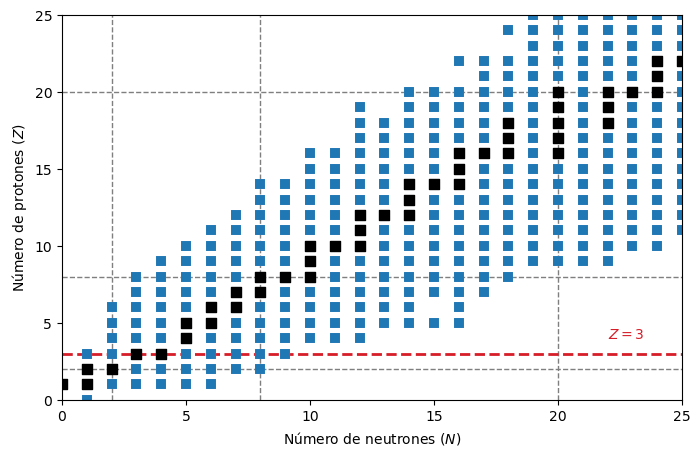

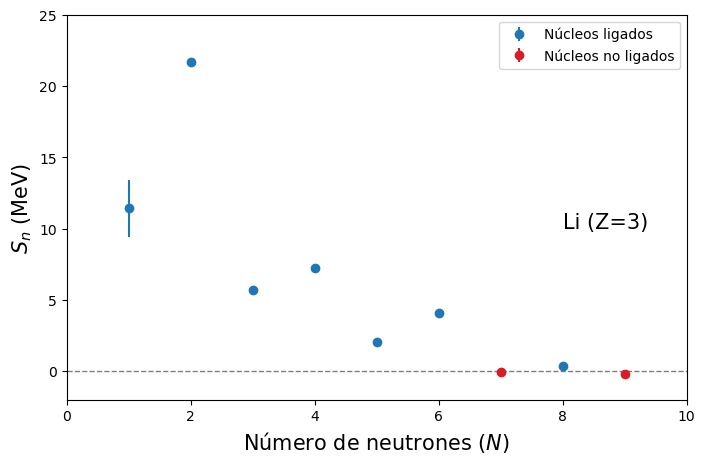

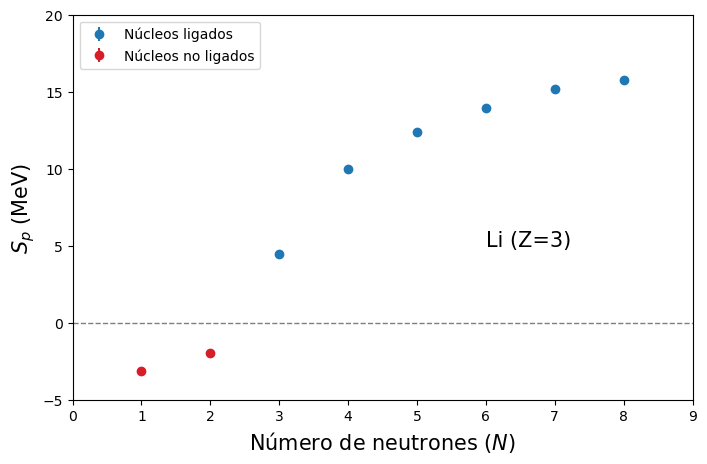

In [11]:
dfF = df.query('z==3')
dfFAp = dfF.dropna(subset=['sp', 'unc_sp'])
dfFAn = dfF.dropna(subset=['sn', 'unc_sn'])

df1 = dfFAp.loc[(dfFAp['sp'] >= 0)]
df2 = dfFAp.loc[(dfFAp['sp'] < 0)]

df3 = dfFAn.loc[(dfFAn['sn'] >= 0)]
df4 = dfFAn.loc[(dfFAn['sn'] < 0)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,25))
ax.set_ylim((0,25))
plt.hlines( [2,8,20,28,50,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed',zorder=0)
plt.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed',zorder=0)
plt.hlines( 3, 0, 25,colors=jpac_color[1], lw=2, linestyles='dashed',zorder=0)
ax.text(22,4,r'$Z=3$',c=jpac_color[1],fontsize=10)
ax.scatter(df['n'],df['z'],marker='s',s=50, c=jpac_color[0],edgecolors='white',lw=0.05)
ax.scatter(df_es['n'],df_es['z'],marker='s',s=50, c=jpac_color[10],zorder=1)
plt.show() 
#fig.savefig('ValleEstabilidadIAEA_ZOOM_Li.pdf', bbox_inches='tight') 

fig = plt.figure(figsize=(8,5))
plt.xlabel(r'Número de neutrones ($N$)',fontsize=15)
plt.ylabel(r'$S_n$ (MeV)',fontsize=15)
plt.ylim((-2,25))
plt.xlim((0,10))
plt.hlines(0,0,10,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.errorbar(df3['n'], df3['sn']/1000,yerr=df3['unc_sn']/1000,fmt='o',c=jpac_color[0],label='Núcleos ligados')
plt.errorbar(df4['n'], df4['sn']/1000,yerr=df4['unc_sn']/1000,fmt='o',c=jpac_color[1],label='Núcleos no ligados')
plt.text(8,10,'Li (Z=3)',c=jpac_color[10],fontsize=15)
plt.legend(loc='upper right',ncol=1,frameon=True)
plt.show()  
#fig.savefig('driplineN_Li.pdf', bbox_inches='tight') 

fig = plt.figure(figsize=(8,5))
plt.xlabel(r'Número de neutrones ($N$)',fontsize=15)
plt.ylabel(r'$S_p$ (MeV)',fontsize=15)
plt.ylim((-5,20))
plt.xlim((0,9))
plt.hlines(0,0,9,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.errorbar(df1['n'], df1['sp']/1000,yerr=df1['unc_sp']/1000,fmt='o',c=jpac_color[0],label='Núcleos ligados')
plt.errorbar(df2['n'], df2['sp']/1000,yerr=df2['unc_sp']/1000,fmt='o',c=jpac_color[1],label='Núcleos no ligados')
plt.text(6,5,'Li (Z=3)',c=jpac_color[10],fontsize=15)
plt.legend(loc='upper left',ncol=1,frameon=True)
plt.show()  
#fig.savefig('driplineP_Li.pdf', bbox_inches='tight') 

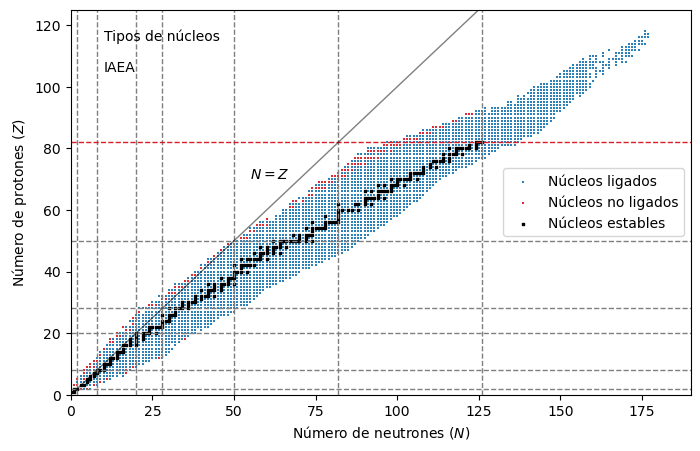

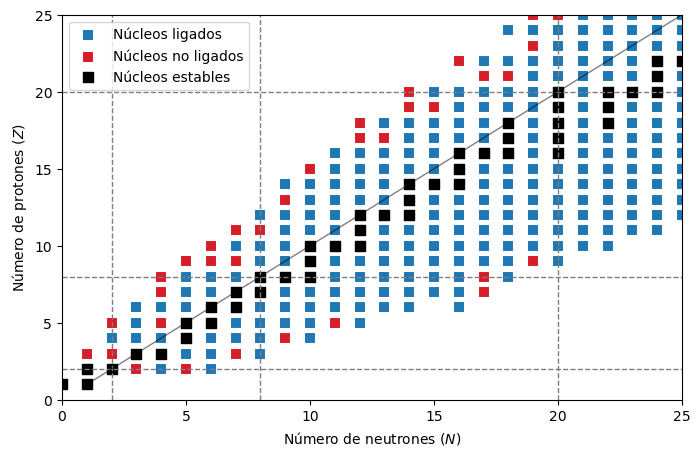

In [12]:
df_es = df.loc[(df['half_life']=='STABLE')]
df_nes = df.loc[(df['half_life']!='STABLE' )]
df_na = df_nes.dropna(subset=['sp', 'sn'])
dfb = df_na.loc[((df['sn'] >= 0) & (df['sp'] >= 0))]
dfu = df_na.loc[((df['sn'] < 0) | (df['sp'] < 0))]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,190))
ax.set_ylim((0,125))
plt.hlines( [2,8,20,28,50,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines( 82, 0, 190,colors=jpac_color[1], lw=1., linestyles='dashed')
ax.plot(x,x,'-',lw=1,color=jpac_color[10],alpha=0.5)
ax.text(10,115,r'Tipos de núcleos',c=jpac_color[10],fontsize=10)
ax.text(10,105,r'IAEA',c=jpac_color[10],fontsize=10)
ax.text(55,70,r'$N=Z$',c=jpac_color[10],fontsize=10)
ax.scatter(dfb['n'],dfb['z'],marker='s',s=2, c=jpac_color[0],edgecolors='white',lw=0.05,label='Núcleos ligados')
ax.scatter(dfu['n'],dfu['z'],marker='s',s=2, c=jpac_color[1],edgecolors='white',lw=0.05,label='Núcleos no ligados')
ax.scatter(df_es['n'],df_es['z'],marker='s',s=2, c=jpac_color[10],label='Núcleos estables')
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show() 
#fig.savefig('TiposdeNucleos.pdf', bbox_inches='tight') 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,25))
ax.set_ylim((0,25))
plt.hlines( [2,8,20,28,50,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines( 82, 0, 190,colors=jpac_color[1], lw=1., linestyles='dashed')
ax.plot(x,x,'-',lw=1,color=jpac_color[10],alpha=0.5)
ax.scatter(dfb['n'],dfb['z'],marker='s',s=50, c=jpac_color[0],edgecolors='white',lw=0.05,label='Núcleos ligados')
ax.scatter(dfu['n'],dfu['z'],marker='s',s=50, c=jpac_color[1],edgecolors='white',lw=0.05,label='Núcleos no ligados')
ax.scatter(df_es['n'],df_es['z'],marker='s',s=50, c=jpac_color[10],label='Núcleos estables')
plt.legend(loc='upper left',ncol=1,frameon=True)
plt.show() 
#fig.savefig('TiposdeNucleosZOOM.pdf', bbox_inches='tight') 


Parábola de masas

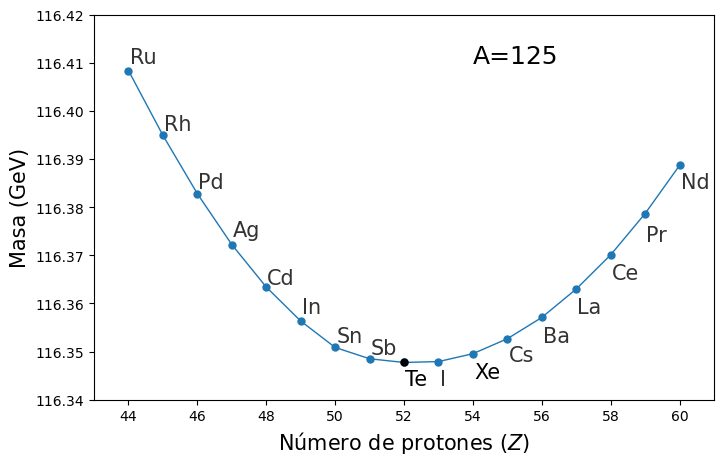

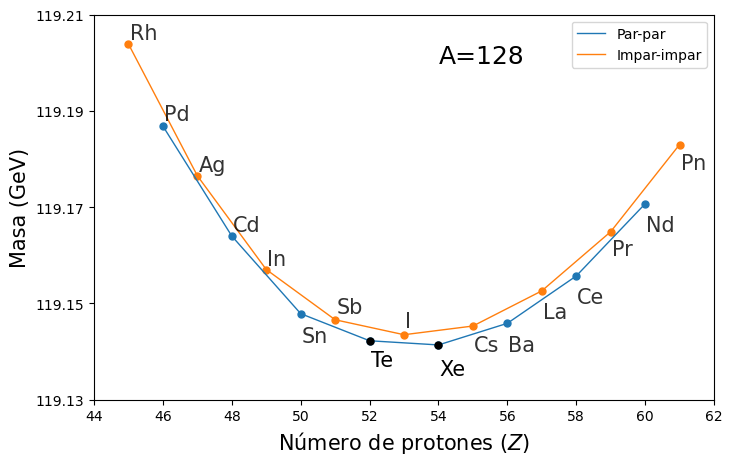

In [13]:
def nucleo(y,Z,nombre):
    if (nombre=='Te' or nombre=='Xe'): 
        plt.text(Z+0.03,y,nombre,c=jpac_color[10],fontsize=15)
    else:
        plt.text(Z+0.03,y,nombre,c=jpac_color[10],alpha=0.8,fontsize=15)

dfAimpar = df.query('A==125')
dfAimparMIN=dfAimpar.loc[  (dfAimpar['atomic_mass']==dfAimpar['atomic_mass'].min() )   ]

fig = plt.figure(figsize=(8,5))
plt.xlabel(r'Número de protones ($Z$)',fontsize=15)
plt.ylabel(r'Masa (GeV)',fontsize=15)
plt.ylim((116.34,116.42))
plt.xlim((43,61))
plt.scatter(dfAimpar['z'],dfAimpar['atomic_mass']*uma,marker='o',s=25,c=jpac_color[0])
plt.plot(dfAimpar['z'],dfAimpar['atomic_mass']*uma,'-',lw=1,c=jpac_color[0])
plt.scatter(dfAimparMIN['z'],dfAimparMIN['atomic_mass']*uma,marker='o',s=25,c=jpac_color[10],zorder=2)
nombres = ['Ru','Rh','Pd','Ag','Cd','In','Sn','Sb','Te','I','Xe','Cs','Ba','La','Ce','Pr','Nd']
yaxis = 116.30*np.ones(len(nombres)) + np.array([ 0.11,  0.096,  0.084,  0.074,   0.064,   0.058,  0.052, 0.0495, 0.043,  0.043, 0.0445,  0.048,   0.052, 0.058,  0.065,  0.073,  0.084])
for z in range(44,61):
    nucleo(yaxis[z-44],z,nombres[z-44])
plt.text(54,116.41,'A=125',c=jpac_color[10],fontsize=18)
#plt.text(44,116.38,r'$\beta^-$',c=jpac_color[1],fontsize=18)
#plt.arrow(44,116.40,1,-0.012,length_includes_head=False,head_width=0.005,head_length=1,overhang=.3,color=jpac_color[1],lw=0.5)
#plt.text(56.9,116.38,r'$\beta^+$',c=jpac_color[2],fontsize=18)
#plt.arrow(59,116.385,-1,-0.0085,length_includes_head=False,head_width=0.005,head_length=1,overhang=.3,color=jpac_color[2],lw=0.5)
plt.show()  
#fig.savefig('ParabolaImpar.pdf', bbox_inches='tight') 

dfApar = df.query('A==128')
dfAparMIN = dfApar.loc[((dfApar['z']==52) | (dfApar['z']==54 ))]
dfAparpar = dfApar.loc[ ((dfApar['z']%2==0) & (dfApar['n']%2==0))]
dfAimparimpar = dfApar.loc[ ((dfApar['z']%2!=0) & (dfApar['n']%2!=0))]

fig = plt.figure(figsize=(8,5))
plt.xlabel(r'Número de protones ($Z$)',fontsize=15)
plt.ylabel(r'Masa (GeV)',fontsize=15)
plt.ylim((119.13,119.21))
plt.xlim((44,62))
plt.yticks([119.13,119.15,119.17,119.19,119.21],['119.13','119.15','119.17','119.19','119.21'])
plt.scatter(dfAparpar['z'],dfAparpar['atomic_mass']*uma,marker='o',s=25,c=jpac_color[0])
plt.plot(dfAparpar['z'],dfAparpar['atomic_mass']*uma,'-',lw=1,c=jpac_color[0],label='Par-par')
plt.scatter(dfAimparimpar['z'],dfAimparimpar['atomic_mass']*uma,marker='o',s=25,c=jpac_color[3])
plt.plot(dfAimparimpar['z'],dfAimparimpar['atomic_mass']*uma,'-',lw=1,c=jpac_color[3],label='Impar-impar')
plt.scatter(dfAparMIN['z'],dfAparMIN['atomic_mass']*uma,marker='o',s=25,c=jpac_color[10],zorder=2)
plt.text(54,119.2,'A=128',c=jpac_color[10],fontsize=18)

nombres1 = ['Rh','Ag','In','Sb','I','Cs','La','Pr','Pn']
yaxis1 = 119.10*np.ones(len(nombres1)) + np.array([ 0.105,0.0775,0.058,0.048,0.045,0.04,0.047,0.06,0.078 ])
nombres2 = ['Pd','Cd','Sn','Te','Xe','Ba','Ce','Nd']
yaxis2 = 119.10*np.ones(len(nombres2)) + np.array([0.088,0.065,0.042,0.037,0.035,0.04,0.05,0.065 ])
i = 0
for z in [45,47,49,51,53,55,57,59,61]:
    nucleo(yaxis1[i],z,nombres1[i])
    i += 1
i = 0
for z in [46,48,50,52,54,56,58,60]:
    nucleo(yaxis2[i],z,nombres2[i])
    i += 1
plt.legend(loc='upper right',ncol=1,frameon=True)
plt.show()
#fig.savefig('ParabolaPar.pdf', bbox_inches='tight') 




Difusión electrón-núcleo

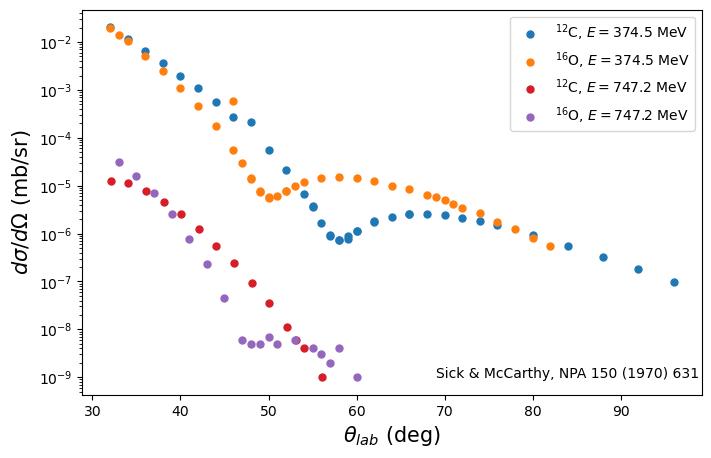

In [14]:
file_SM1= 'SickMcCarthyTable1.csv'
df_SM1 = pd.read_csv(file_SM1,usecols=(0,1,2),sep=',',header=None,skiprows=12)
df_SM1.columns = ('theta', 'dsig', 'unc_dsig')

file_SM2= 'SickMcCarthyTable2.csv'
df_SM2 = pd.read_csv(file_SM2,usecols=(0,1,2),sep=',',header=None,skiprows=12)
df_SM2.columns = ('theta', 'dsig', 'unc_dsig')

file_SM3= 'SickMcCarthyTable3.csv'
df_SM3 = pd.read_csv(file_SM3,usecols=(0,1,2),sep=',',header=None,skiprows=12)
df_SM3.columns = ('theta', 'dsig', 'unc_dsig')

file_SM4= 'SickMcCarthyTable4.csv'
df_SM4 = pd.read_csv(file_SM4,usecols=(0,1,2),sep=',',header=None,skiprows=12)
df_SM4.columns = ('theta', 'dsig', 'unc_dsig')

fig = plt.figure(figsize=(8,5))
plt.xlabel(r'$\theta_{lab}$ (deg)',fontsize=15)
plt.ylabel(r'$d\sigma / d\Omega$ (mb/sr)' ,fontsize=15)
plt.yscale('log')
plt.scatter(df_SM1['theta'],df_SM1['dsig'],marker='o',s=25,c=jpac_color[0],label=r'$^{12}$C, $E=$374.5 MeV')
plt.scatter(df_SM3['theta'],df_SM3['dsig'],marker='o',s=25,c=jpac_color[3],label=r'$^{16}$O, $E=$374.5 MeV')
plt.scatter(df_SM2['theta'],df_SM2['dsig'],marker='o',s=25,c=jpac_color[1],label=r'$^{12}$C, $E=$747.2 MeV')
plt.scatter(df_SM4['theta'],df_SM4['dsig'],marker='o',s=25,c=jpac_color[4],label=r'$^{16}$O, $E=$747.2 MeV')
plt.text(69,0.000000001,'Sick & McCarthy, NPA 150 (1970) 631',c=jpac_color[10],fontsize=10)
plt.legend(loc='upper right',ncol=1,frameon=True)
plt.show()
#fig.savefig('Dispersion_eA.pdf', bbox_inches='tight') 


Deofrmación nuclear

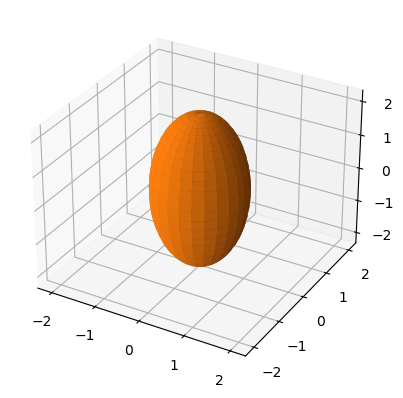

In [15]:
fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

# Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
coefs_e = (1, 1, 1)  # esferico
coefs_p = (1, 1, 1/5)  # prolato
coefs_o = (1/2, 1/2, 1)  # oblato

color = 0; rx, ry, rz = 1/np.sqrt(coefs_e)
color = 1; rx, ry, rz = 1/np.sqrt(coefs_o)
color = 3; rx, ry, rz = 1/np.sqrt(coefs_p)

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))
ax.plot_surface(x, y, z,  rstride=4, cstride=4, color=jpac_color[color])
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

plt.show()
#fig.savefig('forma_nuclear.pdf', bbox_inches='tight') 


270


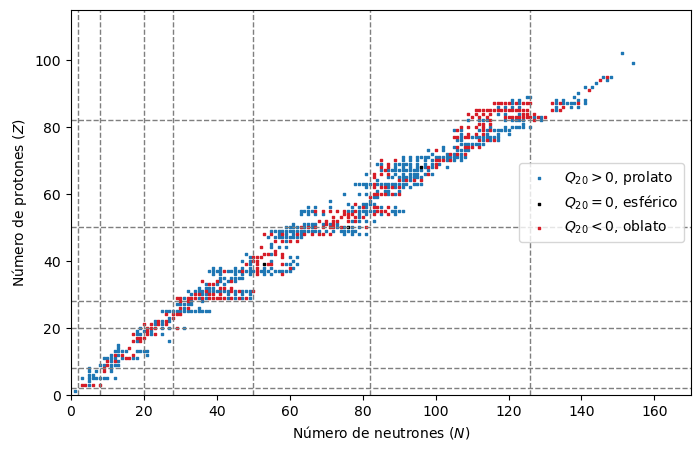

In [16]:
dfp = df.loc[(df['electric_quadrupole']>0)].dropna(subset=['electric_quadrupole'])
dfo = df.loc[(df['electric_quadrupole']<0)].dropna(subset=['electric_quadrupole'])
dfe = df.loc[(df['electric_quadrupole']==0)].dropna(subset=['electric_quadrupole'])

print(len(dfo['electric_quadrupole']))


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,170))
ax.set_ylim((0,115))
plt.hlines( [2,8,20,28,50,82,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed')
ax.scatter(dfp['n'],dfp['z'],marker='s',s=4.6, c=jpac_color[0],edgecolors=jpac_color[0],label=r'$Q_{20}>0$, prolato')
ax.scatter(dfe['n'],dfe['z'],marker='s',s=4.6, c=jpac_color[10],edgecolors=jpac_color[10],label=r'$Q_{20}=0$, esférico')
ax.scatter(dfo['n'],dfo['z'],marker='s',s=4.6, c=jpac_color[1],edgecolors=jpac_color[1],label=r'$Q_{20}<0$, oblato' )
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show() 
#fig.savefig('OblatoProlato.pdf', bbox_inches='tight') 


Momento dipolar magnético

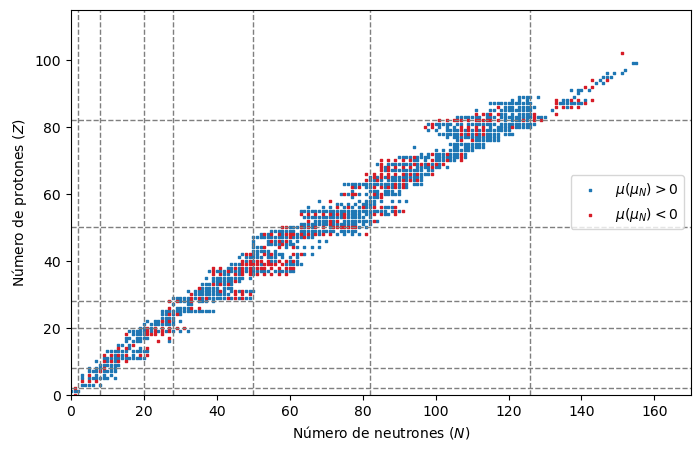

In [17]:
dfp = df.loc[(df['magnetic_dipole']>0)].dropna(subset=['magnetic_dipole'])
dfo = df.loc[(df['magnetic_dipole']<0)].dropna(subset=['magnetic_dipole'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,170))
ax.set_ylim((0,115))
plt.hlines( [2,8,20,28,50,82,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed')
ax.scatter(dfp['n'],dfp['z'],marker='s',s=4.6, c=jpac_color[0],edgecolors=jpac_color[0],label=r'$\mu(\mu_N) >0$')
ax.scatter(dfo['n'],dfo['z'],marker='s',s=4.6, c=jpac_color[1],edgecolors=jpac_color[1],label=r'$\mu(\mu_N)<0$')
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show() 
#fig.savefig('DipoloMagnetico.pdf', bbox_inches='tight') 
